In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os

# Navigate to the directory containing your data
os.chdir('/content/drive/MyDrive/Projet s5 /Projet S5 Dataset')


In [7]:
train_data = '/content/drive/MyDrive/Projet s5 /Projet S5 Dataset/train'
test_data = '/content/drive/MyDrive/Projet s5 /Projet S5 Dataset/test'
val_data = '/content/drive/MyDrive/Projet s5 /Projet S5 Dataset/validation'


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [9]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_data,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 3115 files belonging to 36 classes.


In [10]:
validation_set = tf.keras.utils.image_dataset_from_directory(
     val_data,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 351 files belonging to 36 classes.


In [11]:
testing_set = tf.keras.utils.image_dataset_from_directory(
     test_data,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 359 files belonging to 36 classes.


In [12]:
class_names = training_set.class_names

print("Training Class Names:", class_names)
# Fetch class names from the testing set
test_class_names = testing_set.class_names
print("Test Class Names:", test_class_names)

# Fetch class names from the validation set
validation_class_names = validation_set.class_names
print("Validation Class Names:", validation_class_names)


Training Class Names: ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']
Test Class Names: ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']
Validation Class Names: ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumbe

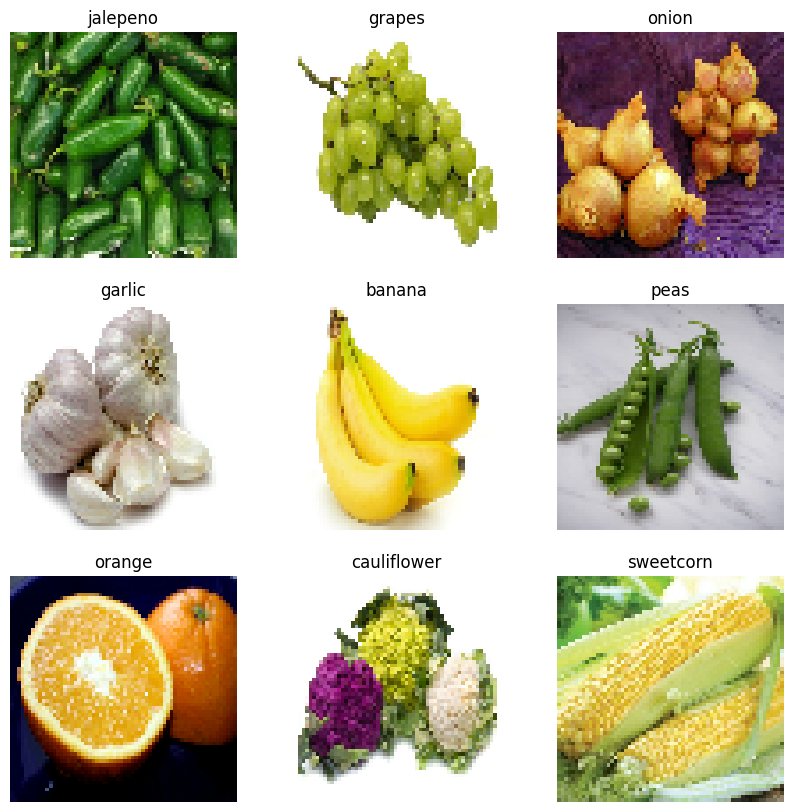

In [13]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Fetch a batch of images and labels from the training set
for images, labels in training_set.take(1):
    plt.figure(figsize=(10, 10))
    class_names = training_set.class_names  # Get the class names
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        # Display label by converting it to class name
        label_index = tf.argmax(labels[i]).numpy()
        class_name = class_names[label_index]
        plt.title(class_name)
        plt.axis('off')
    plt.show()


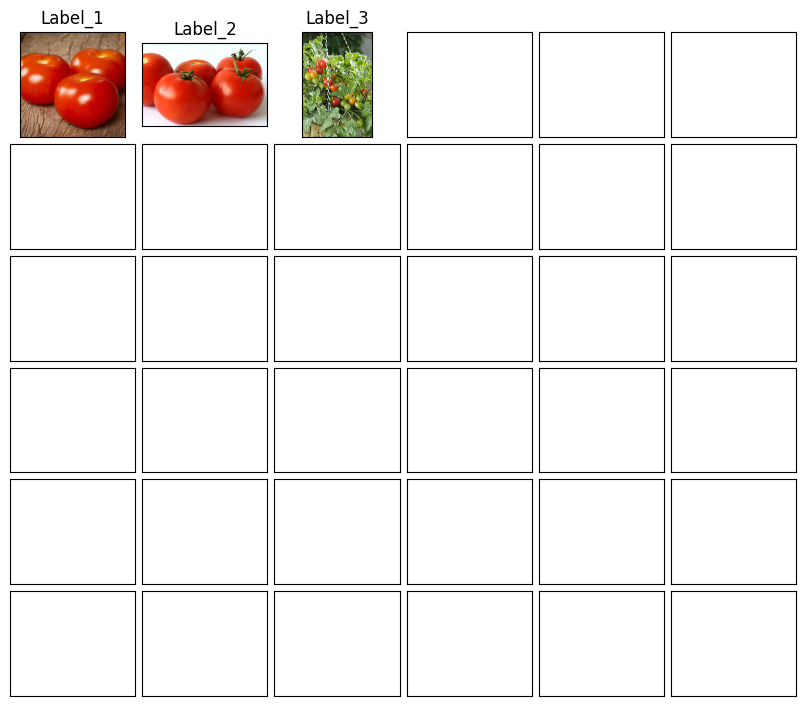

In [37]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

# Define the path to the training directory
train_dir = Path('/content/drive/MyDrive/Projet s5 /Projet S5 Dataset/train')

# Create a list with the filepaths for training images
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

# Placeholder labels (replace this with your actual label generation logic)
labels = ['Label_1', 'Label_2', 'Label_3'] * (len(train_filepaths) // 3)  # Adjust labels based on your dataset

# Create a DataFrame with 'Filepath' and 'Label'
train_df = pd.DataFrame({
    'Filepath': train_filepaths[:len(labels)],  # Truncate file paths if needed
    'Label': labels
})

# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for index, row in df_unique.iterrows():
    ax = axes.flat[index]
    ax.imshow(plt.imread(row['Filepath']))
    ax.set_title(row['Label'], fontsize=12)

plt.tight_layout(pad=0.5)
plt.show()


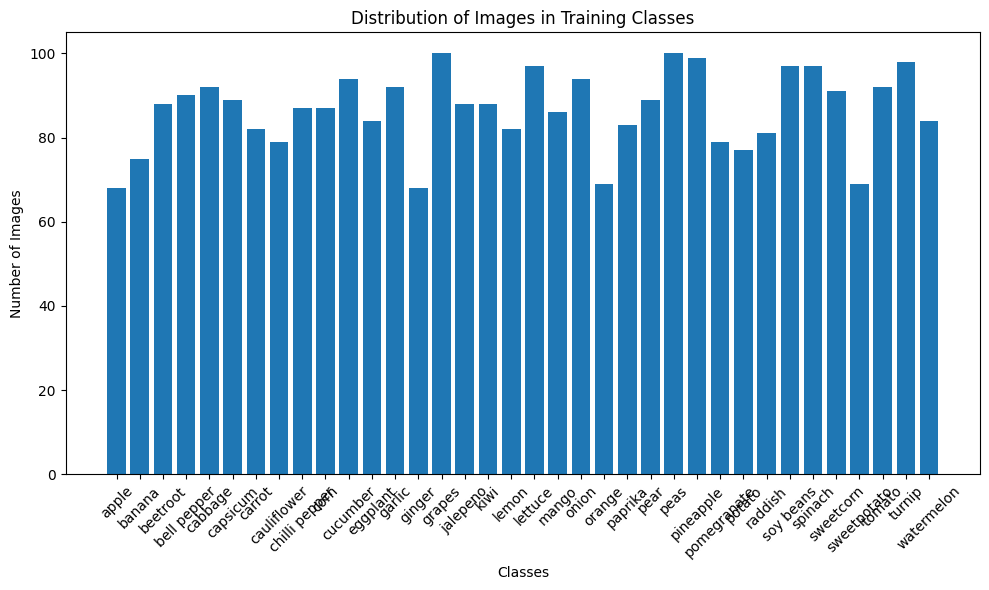

In [15]:
# Fetch class names from the training set
class_names = training_set.class_names

# Count the number of images in each class
class_image_counts = {class_name: 0 for class_name in class_names}
for _, labels in training_set:
    for label in labels.numpy():
        class_index = tf.argmax(label).numpy()
        class_image_counts[class_names[class_index]] += 1

# Plotting the distribution of images in each class
plt.figure(figsize=(10, 6))
plt.bar(class_image_counts.keys(), class_image_counts.values())
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Images in Training Classes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

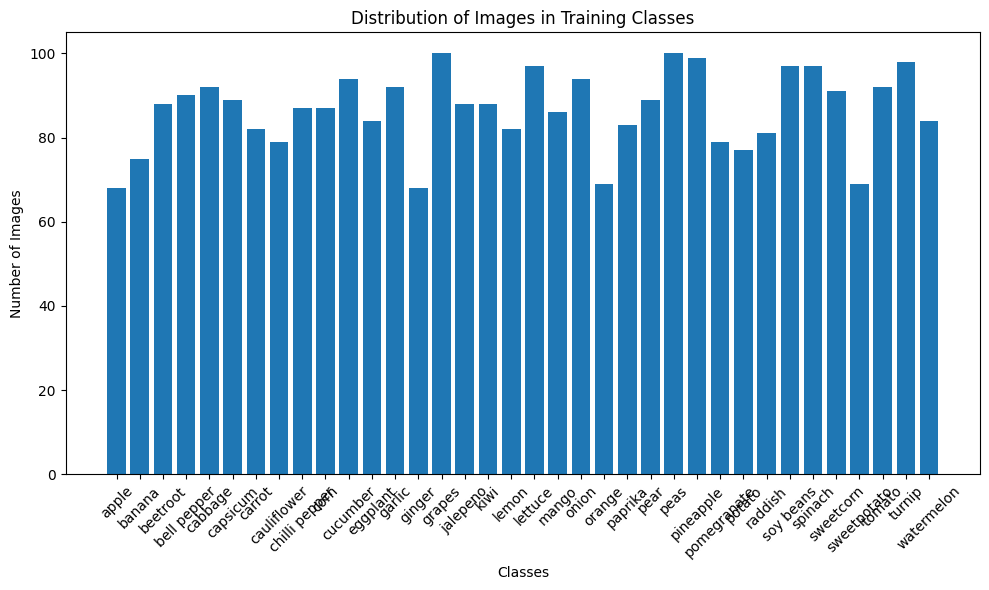

In [17]:
# Fetch class names from the training set
class_names = testing_set.class_names

# Count the number of images in each class
class_image_counts = {class_name: 0 for class_name in class_names}
for _, labels in training_set:
    for label in labels.numpy():
        class_index = tf.argmax(label).numpy()
        class_image_counts[class_names[class_index]] += 1

# Plotting the distribution of images in each class
plt.figure(figsize=(10, 6))
plt.bar(class_image_counts.keys(), class_image_counts.values())
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Images in Training Classes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

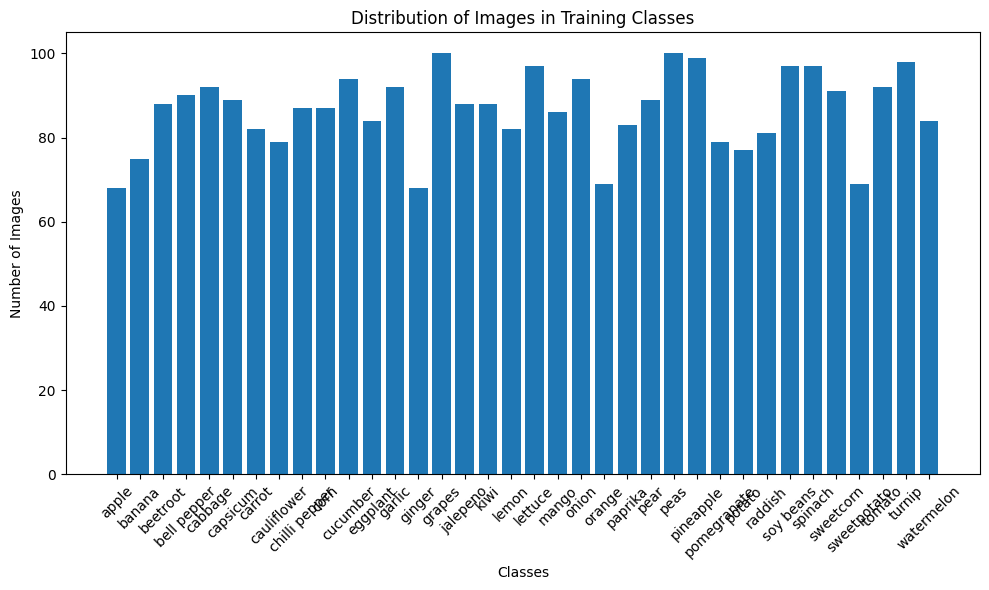

In [18]:
# Fetch class names from the training set
class_names = validation_set.class_names

# Count the number of images in each class
class_image_counts = {class_name: 0 for class_name in class_names}
for _, labels in training_set:
    for label in labels.numpy():
        class_index = tf.argmax(label).numpy()
        class_image_counts[class_names[class_index]] += 1

# Plotting the distribution of images in each class
plt.figure(figsize=(10, 6))
plt.bar(class_image_counts.keys(), class_image_counts.values())
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Images in Training Classes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

### **image size distribution**

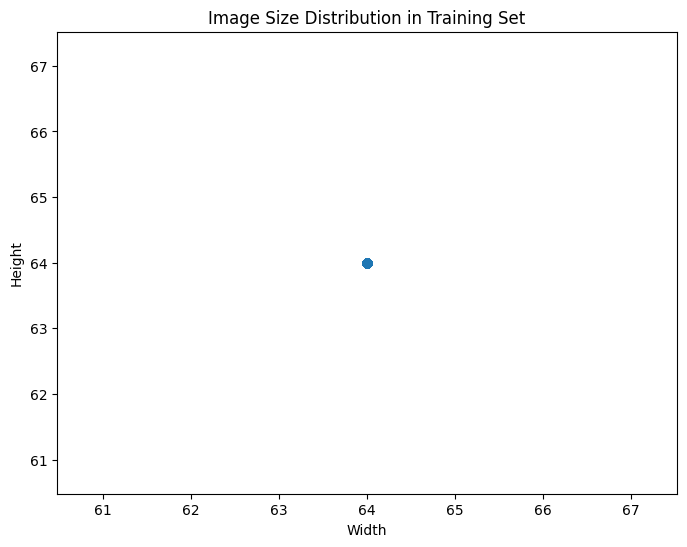

In [20]:
# Fetch image sizes in the training dataset
train_image_sizes = []
for images, _ in training_set:
    for image in images:
        train_image_sizes.append((image.shape[0], image.shape[1]))  # (height, width)

# Plotting the distribution of image sizes in the training dataset
train_heights, train_widths = zip(*train_image_sizes)
plt.figure(figsize=(8, 6))
plt.scatter(train_widths, train_heights)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image Size Distribution in Training Set')
plt.show()

### **visualize the distribution of pixel intensities for different channels (RGB)**

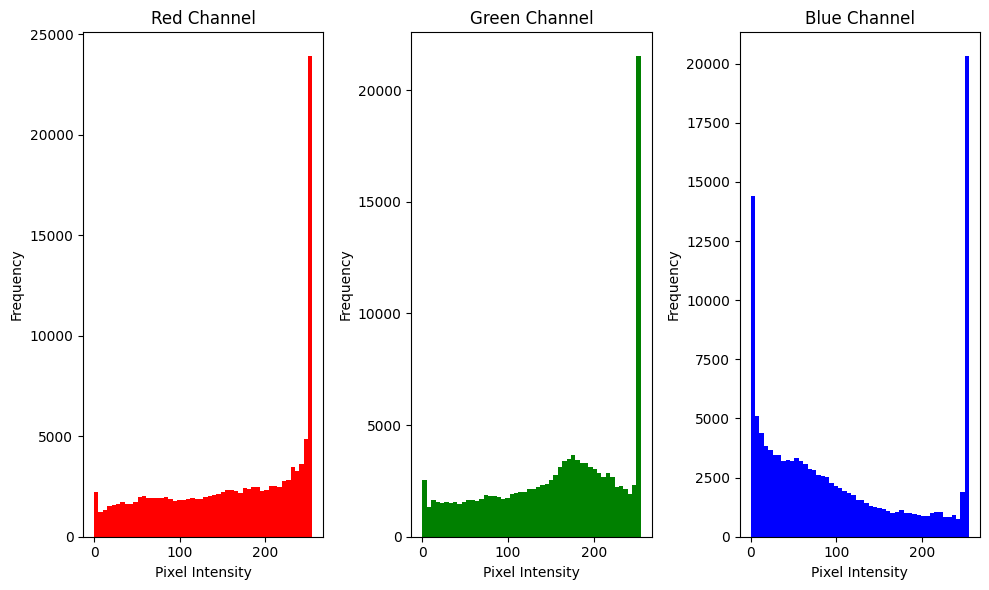

In [21]:
# Fetch a batch of images from the training dataset
for images, _ in training_set.take(1):
    # Plot histograms for pixel intensities in RGB channels
    plt.figure(figsize=(10, 6))

    # Iterate through each channel (R, G, B)
    for i, channel in enumerate(['Red Channel', 'Green Channel', 'Blue Channel']):
        plt.subplot(1, 3, i + 1)
        plt.hist(images[:, :, :, i].numpy().flatten(), bins=50, color=channel.split()[0].lower())
        plt.title(channel)
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

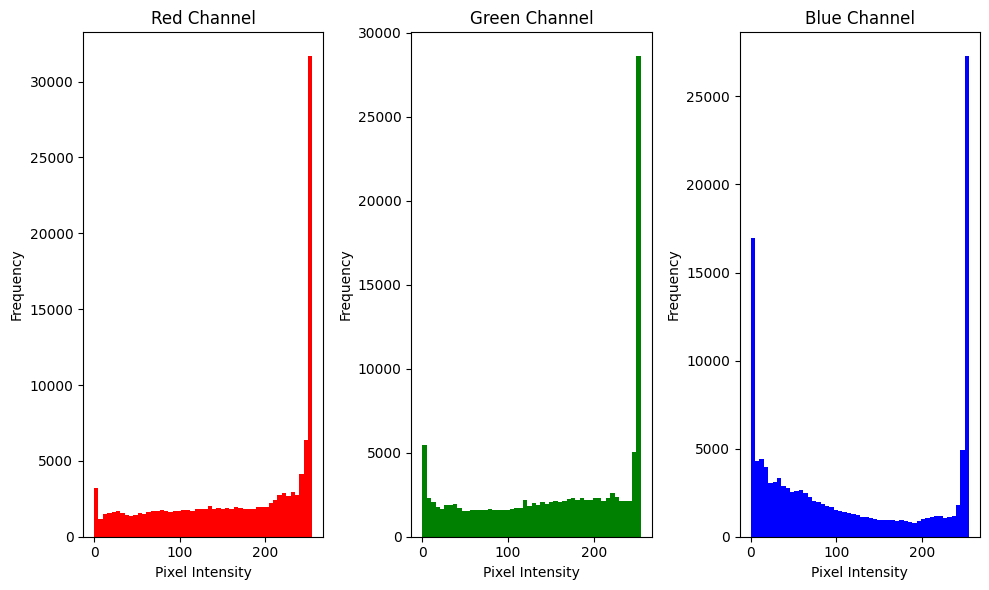

In [22]:
# Fetch a batch of images from the training dataset
for images, _ in testing_set.take(1):
    # Plot histograms for pixel intensities in RGB channels
    plt.figure(figsize=(10, 6))

    # Iterate through each channel (R, G, B)
    for i, channel in enumerate(['Red Channel', 'Green Channel', 'Blue Channel']):
        plt.subplot(1, 3, i + 1)
        plt.hist(images[:, :, :, i].numpy().flatten(), bins=50, color=channel.split()[0].lower())
        plt.title(channel)
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

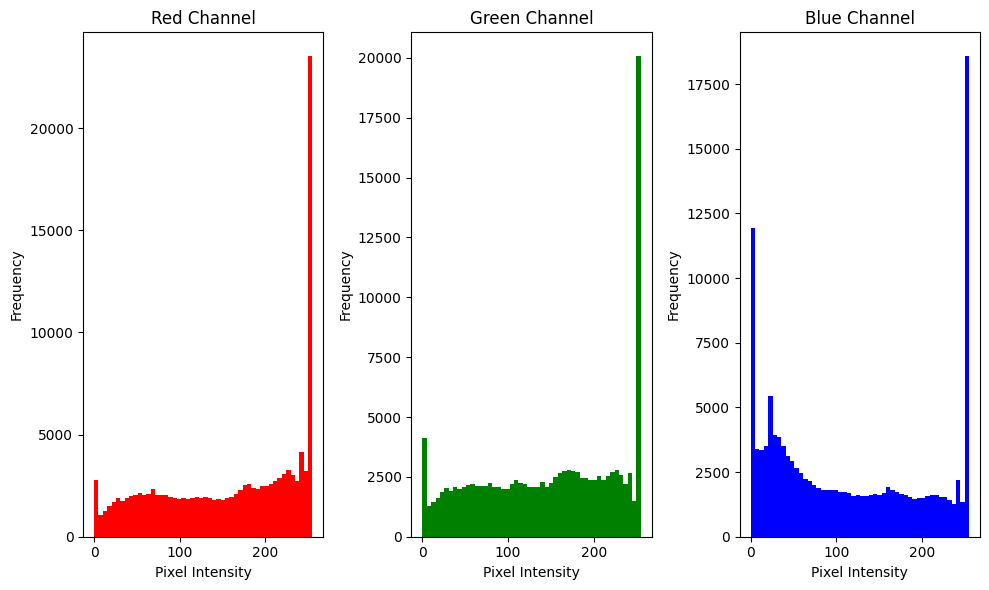

In [23]:
# Fetch a batch of images from the training dataset
for images, _ in validation_set.take(1):
    # Plot histograms for pixel intensities in RGB channels
    plt.figure(figsize=(10, 6))

    # Iterate through each channel (R, G, B)
    for i, channel in enumerate(['Red Channel', 'Green Channel', 'Blue Channel']):
        plt.subplot(1, 3, i + 1)
        plt.hist(images[:, :, :, i].numpy().flatten(), bins=50, color=channel.split()[0].lower())
        plt.title(channel)
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

### **Test de flou **

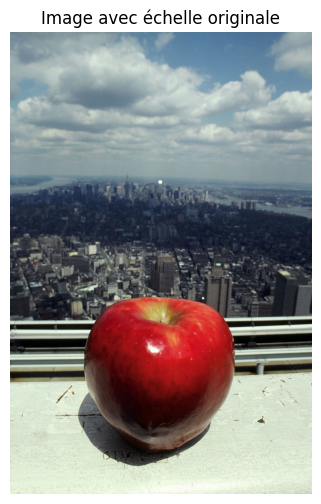

In [28]:
from PIL import Image
import matplotlib.pyplot as plt

# Chemin de votre image dans Google Drive
image_path = '/content/drive/MyDrive/Projet s5 /Projet S5 Dataset/train/apple/Image_19.jpg'

# Charger l'image à l'aide de PIL (Pillow)
img = Image.open(image_path)

# Afficher l'image sans redimensionnement
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title('Image avec échelle originale')
plt.axis('off')
plt.show()


### **Data Augmentation**

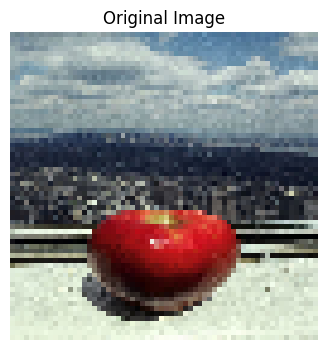

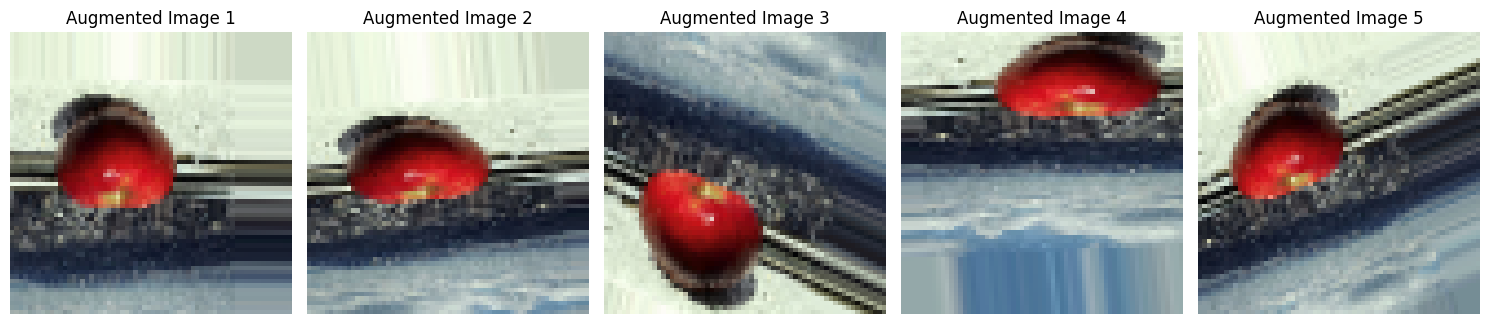

In [26]:
# Define path to the training data directory
train_data_directory = '/content/drive/MyDrive/Projet s5 /Projet S5 Dataset/train'

# Create ImageDataGenerator for data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,      # Degree range for random rotations
    width_shift_range=0.2,  # Range for horizontal random shifts
    height_shift_range=0.2, # Range for vertical random shifts
    zoom_range=0.2,         # Range for random zoom
    horizontal_flip=True,   # Randomly flip images horizontally
    vertical_flip=True,     # Randomly flip images vertically
    fill_mode='nearest'     # Strategy for filling in newly created pixels
)

# Load a sample image from the training dataset
sample_image_path = '/content/drive/MyDrive/Projet s5 /Projet S5 Dataset/train/apple/Image_19.jpg'
sample_image = tf.keras.preprocessing.image.load_img(sample_image_path, target_size=(64, 64))

# Display the original image
plt.figure(figsize=(4, 4))
plt.imshow(sample_image)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Generate augmented images
augmented_images = []
num_augmented = 5  # Number of augmented images to generate

# Apply data augmentation to the sample image
for i in range(num_augmented):
    augmented_img = datagen.random_transform(tf.keras.preprocessing.image.img_to_array(sample_image))
    augmented_images.append(augmented_img)

# Display the augmented images
plt.figure(figsize=(15, 6))
for i in range(num_augmented):
    plt.subplot(1, num_augmented, i+1)
    plt.imshow(tf.keras.preprocessing.image.array_to_img(augmented_images[i]))
    plt.title(f'Augmented Image {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

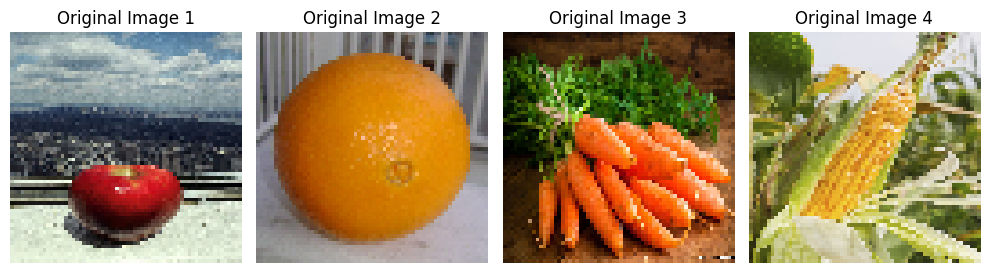

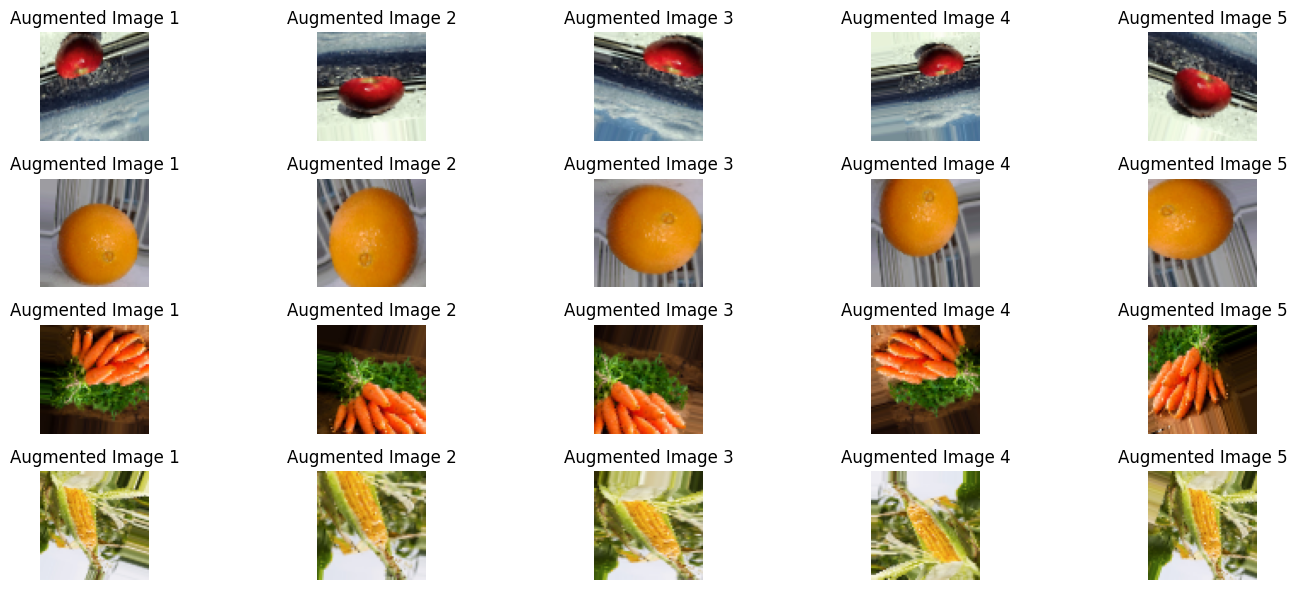

In [40]:
# Define path to the training data directory
train_data_directory = '/content/drive/MyDrive/Projet s5 /Projet S5 Dataset/train'

# Create ImageDataGenerator for data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,      # Degree range for random rotations
    width_shift_range=0.2,  # Range for horizontal random shifts
    height_shift_range=0.2, # Range for vertical random shifts
    zoom_range=0.2,         # Range for random zoom
    horizontal_flip=True,   # Randomly flip images horizontally
    vertical_flip=True,     # Randomly flip images vertically
    fill_mode='nearest'     # Strategy for filling in newly created pixels
)

# Load multiple sample images from the training dataset
sample_image_paths = [
    '/content/drive/MyDrive/Projet s5 /Projet S5 Dataset/train/apple/Image_19.jpg',
    '/content/drive/MyDrive/Projet s5 /Projet S5 Dataset/train/orange/Image_25.jpg',
    '/content/drive/MyDrive/Projet s5 /Projet S5 Dataset/test/carrot/Image_1.jpg',
    '/content/drive/MyDrive/Projet s5 /Projet S5 Dataset/test/corn/Image_2.jpg',

    # Add more paths to different images as needed
]

# Display the original images
plt.figure(figsize=(10, 4))
num_images = len(sample_image_paths)

for i, image_path in enumerate(sample_image_paths):
    sample_image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
    plt.subplot(1, num_images, i+1)
    plt.imshow(sample_image)
    plt.title(f'Original Image {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Generate and display augmented images for each sample image
plt.figure(figsize=(15, 6))
num_augmented = 5  # Number of augmented images to generate

for i, image_path in enumerate(sample_image_paths):
    sample_image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))

    augmented_images = []
    for j in range(num_augmented):
        augmented_img = datagen.random_transform(tf.keras.preprocessing.image.img_to_array(sample_image))
        augmented_images.append(augmented_img)

    for j in range(num_augmented):
        plt.subplot(num_images, num_augmented, i*num_augmented + j + 1)
        plt.imshow(tf.keras.preprocessing.image.array_to_img(augmented_images[j]))
        plt.title(f'Augmented Image {j+1}')
        plt.axis('off')

plt.tight_layout()
plt.show()


In [46]:
from pathlib import Path
import os

# Define the directory to save augmented images
save_directory = '/content/drive/MyDrive/Projet s5 /Augmented_Images1'
os.makedirs(save_directory, exist_ok=True)

# Define the number of augmented images for each original image
num_augmented = 5

# Directory containing all classes (change this path to your actual training data directory)
train_data_directory = '/content/drive/MyDrive/Projet s5 /Projet S5 Dataset/train'

# Iterate through each class directory
for class_name in os.listdir(train_data_directory):
    class_directory = os.path.join(train_data_directory, class_name)

    # Ensure it's a directory
    if os.path.isdir(class_directory):
        # Get all image file paths in the current class directory
        class_image_paths = [os.path.join(class_directory, img) for img in os.listdir(class_directory)]

        # Iterate through each image in the class directory
        for image_path in class_image_paths:
            # Load the original image
            sample_image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))

            # Create a subdirectory within save_directory for each image category if not exists
            category_directory = os.path.join(save_directory, class_name)
            os.makedirs(category_directory, exist_ok=True)

            # Save the original image
            original_image_filename = f'Original_{Path(image_path).stem}.jpg'
            original_image_path = os.path.join(category_directory, original_image_filename)
            sample_image.save(original_image_path)

            # Apply data augmentation
            for j in range(num_augmented):
                augmented_img = datagen.random_transform(tf.keras.preprocessing.image.img_to_array(sample_image))
                augmented_pil_image = tf.keras.preprocessing.image.array_to_img(augmented_img)

                # Save augmented image
                augmented_image_filename = f'Augmented_{j+1}_{Path(image_path).stem}.jpg'
                augmented_image_path = os.path.join(category_directory, augmented_image_filename)
                augmented_pil_image.save(augmented_image_path)

                print(f'Saved: {augmented_image_path}')


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images1/capsicum/Augmented_1_Image_32.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images1/capsicum/Augmented_2_Image_32.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images1/capsicum/Augmented_3_Image_32.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images1/capsicum/Augmented_4_Image_32.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images1/capsicum/Augmented_5_Image_32.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images1/capsicum/Augmented_1_Image_30.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images1/capsicum/Augmented_2_Image_30.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images1/capsicum/Augmented_3_Image_30.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images1/capsicum/Augmented_4_Image_30.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images1/capsicum/Augmented_5_Image

In [48]:
# Directory where augmented images are stored
augmented_images_directory = '/content/drive/MyDrive/Projet s5 /Augmented_Images1'

# Dictionary to store the count of images for each class
class_image_counts = {}
total_images = 0

# Iterate through each class directory in the augmented images directory
for class_name in os.listdir(augmented_images_directory):
    class_directory = os.path.join(augmented_images_directory, class_name)

    # Ensure it's a directory
    if os.path.isdir(class_directory):
        # Get all image file paths in the current class directory
        class_image_paths = [os.path.join(class_directory, img) for img in os.listdir(class_directory)]

        # Count the number of images in the class and store it in the dictionary
        class_image_counts[class_name] = len(class_image_paths)
        total_images += len(class_image_paths)

# Display the count of images in each class
for class_name, count in class_image_counts.items():
    print(f'Class: {class_name}, Number of Images: {count}')

# Display the total number of images
print(f'Total Number of Images: {total_images}')


Class: tomato, Number of Images: 552
Class: watermelon, Number of Images: 504
Class: sweetpotato, Number of Images: 414
Class: turnip, Number of Images: 588
Class: sweetcorn, Number of Images: 546
Class: pomegranate, Number of Images: 474
Class: pear, Number of Images: 534
Class: soy beans, Number of Images: 582
Class: pineapple, Number of Images: 594
Class: paprika, Number of Images: 498
Class: peas, Number of Images: 600
Class: potato, Number of Images: 462
Class: raddish, Number of Images: 486
Class: spinach, Number of Images: 582
Class: garlic, Number of Images: 552
Class: orange, Number of Images: 414
Class: mango, Number of Images: 516
Class: jalepeno, Number of Images: 528
Class: lemon, Number of Images: 492
Class: grapes, Number of Images: 600
Class: ginger, Number of Images: 408
Class: kiwi, Number of Images: 528
Class: lettuce, Number of Images: 582
Class: onion, Number of Images: 564
Class: capsicum, Number of Images: 534
Class: cabbage, Number of Images: 552
Class: chilli p

In [6]:
from pathlib import Path
import os
import tensorflow as tf

# Define the directory to save augmented images
save_directory = '/content/drive/MyDrive/Projet s5 /Augmented_Images_test'
os.makedirs(save_directory, exist_ok=True)

# Define the number of augmented images for each original image
num_augmented = 5

# Create an ImageDataGenerator for data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Directory containing all classes (change this path to your actual test data directory)
test_data_directory = '/content/drive/MyDrive/Projet s5 /Projet S5 Dataset/test'

# Iterate through each class directory
for class_name in os.listdir(test_data_directory):
    class_directory = os.path.join(test_data_directory, class_name)

    # Ensure it's a directory
    if os.path.isdir(class_directory):
        # Get all image file paths in the current class directory
        class_image_paths = [os.path.join(class_directory, img) for img in os.listdir(class_directory)]

        # Iterate through each image in the class directory
        for image_path in class_image_paths:
            # Load the original image
            sample_image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))

            # Create a subdirectory within save_directory for each image category if not exists
            category_directory = os.path.join(save_directory, class_name)
            os.makedirs(category_directory, exist_ok=True)

            # Save the original image
            original_image_filename = f'Original_{Path(image_path).stem}.jpg'
            original_image_path = os.path.join(category_directory, original_image_filename)
            sample_image.save(original_image_path)

            # Apply data augmentation
            for j in range(num_augmented):
                augmented_img = datagen.random_transform(tf.keras.preprocessing.image.img_to_array(sample_image))
                augmented_pil_image = tf.keras.preprocessing.image.array_to_img(augmented_img)

                # Save augmented image
                augmented_image_filename = f'Augmented_{j+1}_{Path(image_path).stem}.jpg'
                augmented_image_path = os.path.join(category_directory, augmented_image_filename)
                augmented_pil_image.save(augmented_image_path)

                print(f'Saved: {augmented_image_path}')


Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images_test/sweetpotato/Augmented_1_Image_1.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images_test/sweetpotato/Augmented_2_Image_1.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images_test/sweetpotato/Augmented_3_Image_1.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images_test/sweetpotato/Augmented_4_Image_1.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images_test/sweetpotato/Augmented_5_Image_1.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images_test/sweetpotato/Augmented_1_Image_3.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images_test/sweetpotato/Augmented_2_Image_3.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images_test/sweetpotato/Augmented_3_Image_3.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images_test/sweetpotato/Augmented_4_Image_3.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images_test/sweetpotato/Augmented_5_Image_3.jpg
Saved: /co

In [7]:
# Directory where augmented images are stored
augmented_images_directory = '/content/drive/MyDrive/Projet s5 /Augmented_Images_test'

# Dictionary to store the count of images for each class
class_image_counts = {}
total_images = 0

# Iterate through each class directory in the augmented images directory
for class_name in os.listdir(augmented_images_directory):
    class_directory = os.path.join(augmented_images_directory, class_name)

    # Ensure it's a directory
    if os.path.isdir(class_directory):
        # Get all image file paths in the current class directory
        class_image_paths = [os.path.join(class_directory, img) for img in os.listdir(class_directory)]

        # Count the number of images in the class and store it in the dictionary
        class_image_counts[class_name] = len(class_image_paths)
        total_images += len(class_image_paths)

# Display the count of images in each class
for class_name, count in class_image_counts.items():
    print(f'Class: {class_name}, Number of Images: {count}')

# Display the total number of images
print(f'Total Number of Images: {total_images}')


Class: sweetpotato, Number of Images: 60
Class: turnip, Number of Images: 60
Class: sweetcorn, Number of Images: 60
Class: watermelon, Number of Images: 60
Class: raddish, Number of Images: 60
Class: spinach, Number of Images: 60
Class: soy beans, Number of Images: 60
Class: tomato, Number of Images: 60
Class: orange, Number of Images: 60
Class: peas, Number of Images: 60
Class: pear, Number of Images: 60
Class: onion, Number of Images: 60
Class: mango, Number of Images: 60
Class: lettuce, Number of Images: 60
Class: potato, Number of Images: 60
Class: pomegranate, Number of Images: 60
Class: pineapple, Number of Images: 60
Class: paprika, Number of Images: 60
Class: corn, Number of Images: 60
Class: lemon, Number of Images: 60
Class: cucumber, Number of Images: 60
Class: kiwi, Number of Images: 60
Class: ginger, Number of Images: 60
Class: chilli pepper, Number of Images: 60
Class: eggplant, Number of Images: 60
Class: grapes, Number of Images: 60
Class: garlic, Number of Images: 60
C

In [8]:
from pathlib import Path
import os
import tensorflow as tf

# Define the directory to save augmented images
save_directory = '/content/drive/MyDrive/Projet s5 /Augmented_Images_validation'
os.makedirs(save_directory, exist_ok=True)

# Define the number of augmented images for each original image
num_augmented = 5

# Create an ImageDataGenerator for data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Directory containing all classes (change this path to your actual test data directory)
test_data_directory = '/content/drive/MyDrive/Projet s5 /Projet S5 Dataset/validation'

# Iterate through each class directory
for class_name in os.listdir(test_data_directory):
    class_directory = os.path.join(test_data_directory, class_name)

    # Ensure it's a directory
    if os.path.isdir(class_directory):
        # Get all image file paths in the current class directory
        class_image_paths = [os.path.join(class_directory, img) for img in os.listdir(class_directory)]

        # Iterate through each image in the class directory
        for image_path in class_image_paths:
            # Load the original image
            sample_image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))

            # Create a subdirectory within save_directory for each image category if not exists
            category_directory = os.path.join(save_directory, class_name)
            os.makedirs(category_directory, exist_ok=True)

            # Save the original image
            original_image_filename = f'Original_{Path(image_path).stem}.jpg'
            original_image_path = os.path.join(category_directory, original_image_filename)
            sample_image.save(original_image_path)

            # Apply data augmentation
            for j in range(num_augmented):
                augmented_img = datagen.random_transform(tf.keras.preprocessing.image.img_to_array(sample_image))
                augmented_pil_image = tf.keras.preprocessing.image.array_to_img(augmented_img)

                # Save augmented image
                augmented_image_filename = f'Augmented_{j+1}_{Path(image_path).stem}.jpg'
                augmented_image_path = os.path.join(category_directory, augmented_image_filename)
                augmented_pil_image.save(augmented_image_path)

                print(f'Saved: {augmented_image_path}')


Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images_validation/raddish/Augmented_1_Image_3.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images_validation/raddish/Augmented_2_Image_3.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images_validation/raddish/Augmented_3_Image_3.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images_validation/raddish/Augmented_4_Image_3.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images_validation/raddish/Augmented_5_Image_3.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images_validation/raddish/Augmented_1_Image_4.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images_validation/raddish/Augmented_2_Image_4.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images_validation/raddish/Augmented_3_Image_4.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images_validation/raddish/Augmented_4_Image_4.jpg
Saved: /content/drive/MyDrive/Projet s5 /Augmented_Images_validation/raddish/Augmented_5_Im

In [9]:
# Directory where augmented images are stored
augmented_images_directory = '/content/drive/MyDrive/Projet s5 /Augmented_Images_validation'

# Dictionary to store the count of images for each class
class_image_counts = {}
total_images = 0

# Iterate through each class directory in the augmented images directory
for class_name in os.listdir(augmented_images_directory):
    class_directory = os.path.join(augmented_images_directory, class_name)

    # Ensure it's a directory
    if os.path.isdir(class_directory):
        # Get all image file paths in the current class directory
        class_image_paths = [os.path.join(class_directory, img) for img in os.listdir(class_directory)]

        # Count the number of images in the class and store it in the dictionary
        class_image_counts[class_name] = len(class_image_paths)
        total_images += len(class_image_paths)

# Display the count of images in each class
for class_name, count in class_image_counts.items():
    print(f'Class: {class_name}, Number of Images: {count}')

# Display the total number of images
print(f'Total Number of Images: {total_images}')


Class: raddish, Number of Images: 54
Class: tomato, Number of Images: 60
Class: potato, Number of Images: 60
Class: turnip, Number of Images: 60
Class: sweetcorn, Number of Images: 60
Class: soy beans, Number of Images: 60
Class: spinach, Number of Images: 60
Class: pomegranate, Number of Images: 60
Class: watermelon, Number of Images: 60
Class: sweetpotato, Number of Images: 60
Class: mango, Number of Images: 60
Class: pear, Number of Images: 60
Class: paprika, Number of Images: 60
Class: orange, Number of Images: 54
Class: pineapple, Number of Images: 60
Class: lemon, Number of Images: 60
Class: onion, Number of Images: 60
Class: kiwi, Number of Images: 60
Class: peas, Number of Images: 60
Class: lettuce, Number of Images: 54
Class: grapes, Number of Images: 54
Class: carrot, Number of Images: 54
Class: eggplant, Number of Images: 60
Class: garlic, Number of Images: 60
Class: corn, Number of Images: 60
Class: cauliflower, Number of Images: 60
Class: ginger, Number of Images: 60
Class

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'raddish'),
  Text(1, 0, 'tomato'),
  Text(2, 0, 'potato'),
  Text(3, 0, 'turnip'),
  Text(4, 0, 'sweetcorn'),
  Text(5, 0, 'soy beans'),
  Text(6, 0, 'spinach'),
  Text(7, 0, 'pomegranate'),
  Text(8, 0, 'watermelon'),
  Text(9, 0, 'sweetpotato'),
  Text(10, 0, 'mango'),
  Text(11, 0, 'pear'),
  Text(12, 0, 'paprika'),
  Text(13, 0, 'orange'),
  Text(14, 0, 'pineapple'),
  Text(15, 0, 'lemon'),
  Text(16, 0, 'onion'),
  Text(17, 0, 'kiwi'),
  Text(18, 0, 'peas'),
  Text(19, 0, 'lettuce'),
  Text(20, 0, 'grapes'),
  Text(21, 0, 'carrot'),
  Text(22, 0, 'eggplant'),
  Text(23, 0, 'garlic'),
  Text(24, 0, 'corn'),
  Text(25, 0, 'cauliflower'),
  Text(26, 0, 'ginger'),
  Text(27, 0, 'chilli pepper'),
  Text(28, 0, 'jalepeno'),
  Text(29, 0, 'cucumber'),
  Text(30, 0, 'appl

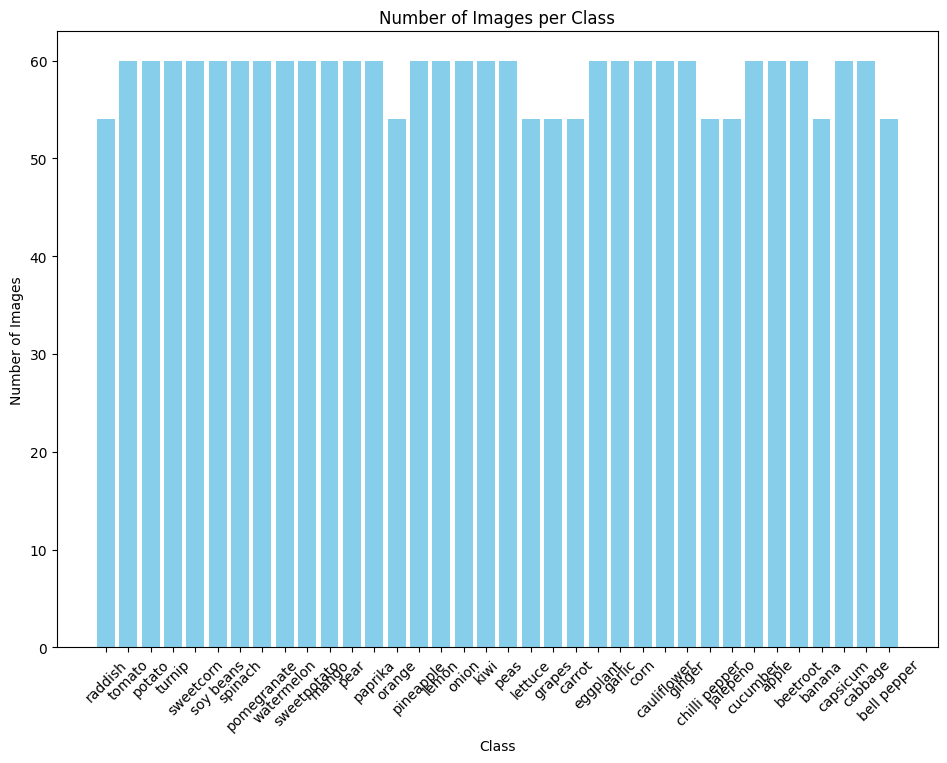

In [15]:
import matplotlib.pyplot as plt

# Plotting the number of images per class
plt.figure(figsize=(25, 8))

# Bar plot for image counts per class
plt.subplot(1, 2, 1)
plt.bar(class_image_counts.keys(), class_image_counts.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.xticks(rotation=45)



### **Training**

In [8]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [18]:
train_data = '/content/drive/MyDrive/Projet s5 /Augmented_Images_train'

training_set = tf.keras.utils.image_dataset_from_directory(
    train_data,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 18708 files belonging to 36 classes.


In [17]:
validation_data = '/content/drive/MyDrive/Projet s5 /Augmented_Images_validation'

validation_set = tf.keras.utils.image_dataset_from_directory(
    validation_data,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 2106 files belonging to 36 classes.
